In [1]:
import pandas as pd
df = pd.read_csv("ECA_data.csv")

In [2]:
df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


In [3]:
#1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

In [4]:
#Categorical datas are RATING, GENDER, EDUCATION, MARITAL, AGE, S(n).
#Numeric are LIMIT, BALANCE, INCOME, B(n) and R(n)

In [5]:
#first data processing
df['R3'] = df['R3'].str.replace('$', '')
df['R3'] = df['R3'].str.replace(',', '')

C:\Users\lynn\AppData\Local\Temp/ipykernel_17176/1246925519.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['R3'] = df['R3'].str.replace('$', '')


In [24]:
#second data processing
to_be_converted = ['S1', 'S2', 'S3', 'S4', 'S5', 'GENDER', 'EDUCATION', 'MARITAL', 'RATING']
for element in to_be_converted:
    df[element] = df[element].astype('category')

In [7]:
df['R3'] = df['R3'].astype(int)
df['ID'] = df['ID'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         18769 non-null  object  
 1   LIMIT      18769 non-null  int64   
 2   BALANCE    18769 non-null  float64 
 3   INCOME     18769 non-null  int64   
 4   RATING     18769 non-null  category
 5   GENDER     18769 non-null  category
 6   EDUCATION  18756 non-null  category
 7   MARITAL    18731 non-null  category
 8   AGE        18769 non-null  int64   
 9   S1         18769 non-null  category
 10  S2         18769 non-null  category
 11  S3         18769 non-null  category
 12  S4         18769 non-null  category
 13  S5         18769 non-null  category
 14  B1         18769 non-null  int64   
 15  B2         18769 non-null  int64   
 16  B3         18769 non-null  int64   
 17  B4         18769 non-null  int64   
 18  B5         18769 non-null  int64   
 19  R1         18769 non-null

In [9]:
#third data processing
df['AGE'] = df['AGE'].astype('str')
df = df[df['AGE'].str.contains('199') == False]
df = df[df['AGE'].str.contains('-1') == False]
df['AGE'] = df['AGE'].astype('int')
df.reset_index(inplace = True)
df.describe()

,index,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
count,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,1.875900e+04,18759.000000,18759.000000,18759.000000,18759.000000
mean,9383.514686,168300.745242,9121.571234,177794.613839,35.544805,49994.467509,48175.841623,45030.851165,41069.926489,39636.619809,6.028522e+03,5653.745562,4937.867690,4765.958207,5187.753931
std,5416.838019,129406.902201,13045.989497,143092.198071,9.159525,71928.956360,70318.472990,66104.017269,61708.421613,59923.594495,2.290477e+04,18619.512528,16467.704459,15035.026737,17428.412339
min,0.000000,10000.000000,0.000000,10000.000000,21.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4693.500000,50000.000000,640.237500,56535.500000,28.000000,3088.500000,2858.000000,2514.500000,1951.000000,1431.500000,1.000000e+03,580.000000,316.000000,286.000000,215.500000
50%,9384.000000,140000.000000,3960.950000,148226.000000,34.000000,21399.000000,20424.000000,19503.000000,18362.000000,17420.000000,2.133000e+03,2000.000000,1500.000000,1510.000000,1548.000000
75%,14073.500000,240000.000000,11977.262500,256900.000000,41.000000,65174.000000,61949.000000,57704.000000,50778.000000,49837.500000,5.002000e+03,5000.000000,4069.000000,4072.500000,4099.000000
max,18768.000000,800000.000000,130692.450000,908846.000000,80.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,527143.000000


In [10]:
#fourth data processing
df['MARITAL'] = df['MARITAL'].fillna(0)
df['EDUCATION'] = df['EDUCATION'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18759 entries, 0 to 18758
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      18759 non-null  int64   
 1   ID         18759 non-null  object  
 2   LIMIT      18759 non-null  int64   
 3   BALANCE    18759 non-null  float64 
 4   INCOME     18759 non-null  int64   
 5   RATING     18759 non-null  category
 6   GENDER     18759 non-null  category
 7   EDUCATION  18759 non-null  category
 8   MARITAL    18759 non-null  category
 9   AGE        18759 non-null  int32   
 10  S1         18759 non-null  category
 11  S2         18759 non-null  category
 12  S3         18759 non-null  category
 13  S4         18759 non-null  category
 14  S5         18759 non-null  category
 15  B1         18759 non-null  int64   
 16  B2         18759 non-null  int64   
 17  B3         18759 non-null  int64   
 18  B4         18759 non-null  int64   
 19  B5         18759 non-null

In [11]:
#first insight
df.corr()

,index,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
index,1.000000,0.049063,0.019004,0.048530,0.029935,0.016737,0.018465,0.028682,0.010528,0.009880,0.007582,0.031514,0.002395,0.007507,0.011777
LIMIT,0.049063,1.000000,0.288485,0.993748,0.141455,0.279517,0.283576,0.293616,0.301605,0.297745,0.171929,0.203155,0.202476,0.222839,0.212144
BALANCE,0.019004,0.288485,1.000000,0.286374,0.057953,0.950897,0.901666,0.861572,0.823910,0.794227,0.110030,0.134363,0.162088,0.156118,0.202809
INCOME,0.048530,0.993748,0.286374,1.000000,0.140584,0.277415,0.281655,0.291658,0.299475,0.296167,0.169926,0.199459,0.200383,0.222437,0.210783
AGE,0.029935,0.141455,0.057953,0.140584,1.000000,0.057463,0.057925,0.058298,0.055332,0.050637,0.018312,0.024212,0.013682,0.018106,0.017487
B1,0.016737,0.279517,0.950897,0.277415,0.057463,1.000000,0.939025,0.894202,0.853512,0.824139,0.113956,0.124793,0.144896,0.145481,0.187246
B2,0.018465,0.283576,0.901666,0.281655,0.057925,0.939025,1.000000,0.930119,0.882216,0.848763,0.284459,0.107936,0.134645,0.155903,0.194446
B3,0.028682,0.293616,0.861572,0.291658,0.058298,0.894202,0.930119,1.000000,0.935719,0.896781,0.215450,0.293085,0.130875,0.156728,0.192047
B4,0.010528,0.301605,0.823910,0.299475,0.055332,0.853512,0.882216,0.935719,1.000000,0.945036,0.193014,0.247041,0.296894,0.139055,0.174457
B5,0.009880,0.297745,0.794227,0.296167,0.050637,0.824139,0.848763,0.896781,0.945036,1.000000,0.179642,0.225060,0.258609,0.304300,0.126849


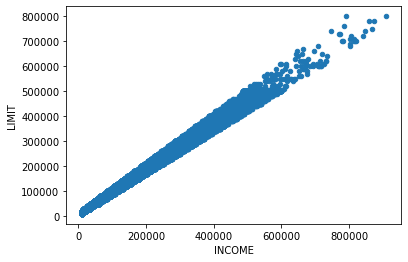

In [12]:
import matplotlib.pyplot as plt

df.plot(x = 'INCOME', y = 'LIMIT', kind = 'scatter')
plt.show()

In [13]:
#second insight
df.groupby('S1').mean() #(2)

,index,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
S1,,,,,,,,,,,,,,,
-1,9274.900333,208739.589117,1475.708877,221730.338145,36.249861,9700.243753,12107.800944,13864.258468,12621.638534,11953.363964,9063.246252,8494.436147,5867.401999,5658.575514,6169.057746
0,9508.802103,171005.554387,11367.310855,180853.394743,35.349373,61737.395228,58438.423696,53627.071654,48568.011888,46829.381965,5832.168378,5487.007440,5105.685888,4965.057905,5339.100849
1,8828.894737,167368.421053,14848.989474,178760.368421,34.052632,34627.052632,66384.421053,47677.473684,44744.631579,43059.052632,34603.947368,3848.684211,3680.263158,2737.842105,17916.894737
2,8960.264694,106826.104580,9052.249899,110674.893798,35.491285,50318.487637,49439.767734,47324.921767,44684.931901,43552.004864,3000.323064,2767.978111,3111.406567,2818.625051,3125.138630
3,8821.649038,80480.769231,6906.806611,80090.033654,35.461538,38975.230769,38205.769231,39257.750000,37337.629808,37366.971154,1079.937500,3161.456731,1938.658654,2180.379808,2454.610577
4,9899.000000,64861.111111,9839.960764,62922.666667,35.652778,55341.958333,52453.777778,48578.708333,46014.930556,44554.569444,562.819444,741.652778,2916.111111,1924.430556,6165.625000
5,8315.769231,66153.846154,12080.357692,66183.000000,34.769231,66899.307692,64996.769231,52524.384615,45973.000000,44548.307692,238.846154,38.461538,323.076923,1811.846154,981.076923
6,11427.000000,122000.000000,21645.960000,116594.400000,35.200000,111741.400000,108954.400000,106791.000000,104718.600000,99401.000000,188.000000,305.600000,21.200000,456.200000,9351.400000
7,6903.750000,148750.000000,26856.746875,157542.125000,42.875000,151194.500000,148099.000000,144929.000000,141965.375000,140589.500000,0.000000,8.750000,0.000000,750.000000,1751.875000


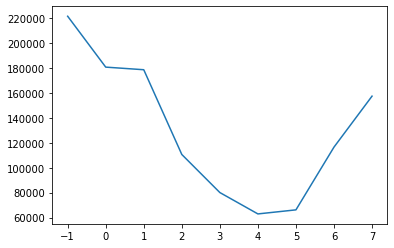

In [14]:
plt.plot(df.groupby('S1').mean().index, df.groupby('S1').mean()['INCOME'])
plt.show()

In [15]:
#third insight
df.groupby('RATING').mean() #(3)

,index,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
RATING,,,,,,,,,,,,,,,
0,9453.225143,180355.503961,9274.616061,190980.146476,35.451243,50589.666963,48730.096012,45469.712442,41344.311937,39857.018574,6731.606392,6242.637258,5418.073955,5257.793158,5674.716539
1,9135.436938,125401.623329,8576.932485,130871.420656,35.877764,47876.338518,46203.423329,43469.080923,40093.474362,38852.289429,3526.463670,3558.063913,3228.963548,3015.671203,3454.806075


Text(0, 0.5, 'Balance')

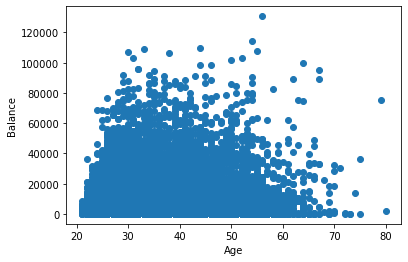

In [16]:
#forth insight: now lets investigate the cluster for age vs balance, but have to remove the age 199
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df['AGE'],df['BALANCE'])
plt.xlabel('Age')
plt.ylabel('Balance')

In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['AGE', 'BALANCE']])
y_predicted

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
df['cluster']=y_predicted
df.head()

,index,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,...,B2,B3,B4,B5,R1,R2,R3,R4,R5,cluster
0,0,1,210000,0.00,235822,1,1,1.0,2.0,30,...,0,0,0,0,0,0,0,0,0,0
1,1,2,260000,10928.05,278481,0,0,2.0,2.0,31,...,46407,38874,31324,24031,2000,2000,2000,2000,72000,0
2,2,3,400000,65397.85,431993,0,0,3.0,1.0,51,...,352484,338823,283288,185288,15000,14000,11500,8000,7000,1
3,3,4,20000,3695.30,22368,0,0,2.0,1.0,58,...,200,0,28740,1295,0,0,28740,1565,0,0
4,4,5,180000,68.25,166900,0,1,2.0,1.0,42,...,598,2056,4300,1802,598,2056,4300,1802,3691,0


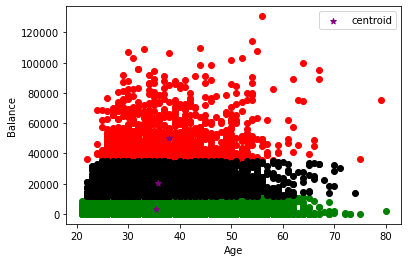

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.AGE,df1['BALANCE'],color='green')
plt.scatter(df2.AGE,df2['BALANCE'],color='red')
plt.scatter(df3.AGE,df3['BALANCE'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend()

In [20]:
#fifth insight
df.groupby('EDUCATION').mean()

,index,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5,cluster
EDUCATION,,,,,,,,,,,,,,,,
0.0,10451.703170,184253.602305,12361.075072,194584.337176,36.564841,64851.371758,62988.224784,54655.922190,45948.876081,39847.103746,8709.858790,8249.789625,5017.158501,5585.224784,6303.302594,0.671470
1.0,9386.113956,214364.658133,8661.139174,228272.574149,34.223384,47885.979238,46485.382298,44533.086950,41354.791446,39601.969872,7239.746488,7153.449735,6032.333437,5790.468779,6314.909460,0.424602
2.0,9233.370391,148732.664336,9594.627249,156487.796708,34.818356,52409.596347,50167.608299,46661.820160,42411.771677,41359.197655,5310.202616,4963.375916,4555.315594,4440.505919,4784.565453,0.485060
3.0,9684.540325,127793.331208,8366.036054,133096.594517,40.184252,45828.656997,44358.247370,40371.531399,36154.827542,34813.982467,5289.358623,4255.899267,3775.672298,3503.330252,3902.521199,0.425247


In [21]:
#Question 4: Finding the best variable to predict B1
df.corr()

,index,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5,cluster
index,1.000000,0.049063,0.019004,0.048530,0.029935,0.016737,0.018465,0.028682,0.010528,0.009880,0.007582,0.031514,0.002395,0.007507,0.011777,0.012907
LIMIT,0.049063,1.000000,0.288485,0.993748,0.141455,0.279517,0.283576,0.293616,0.301605,0.297745,0.171929,0.203155,0.202476,0.222839,0.212144,0.137036
BALANCE,0.019004,0.288485,1.000000,0.286374,0.057953,0.950897,0.901666,0.861572,0.823910,0.794227,0.110030,0.134363,0.162088,0.156118,0.202809,0.633738
INCOME,0.048530,0.993748,0.286374,1.000000,0.140584,0.277415,0.281655,0.291658,0.299475,0.296167,0.169926,0.199459,0.200383,0.222437,0.210783,0.136294
AGE,0.029935,0.141455,0.057953,0.140584,1.000000,0.057463,0.057925,0.058298,0.055332,0.050637,0.018312,0.024212,0.013682,0.018106,0.017487,0.025793
B1,0.016737,0.279517,0.950897,0.277415,0.057463,1.000000,0.939025,0.894202,0.853512,0.824139,0.113956,0.124793,0.144896,0.145481,0.187246,0.606821
B2,0.018465,0.283576,0.901666,0.281655,0.057925,0.939025,1.000000,0.930119,0.882216,0.848763,0.284459,0.107936,0.134645,0.155903,0.194446,0.576092
B3,0.028682,0.293616,0.861572,0.291658,0.058298,0.894202,0.930119,1.000000,0.935719,0.896781,0.215450,0.293085,0.130875,0.156728,0.192047,0.557307
B4,0.010528,0.301605,0.823910,0.299475,0.055332,0.853512,0.882216,0.935719,1.000000,0.945036,0.193014,0.247041,0.296894,0.139055,0.174457,0.538172
B5,0.009880,0.297745,0.794227,0.296167,0.050637,0.824139,0.848763,0.896781,0.945036,1.000000,0.179642,0.225060,0.258609,0.304300,0.126849,0.530818


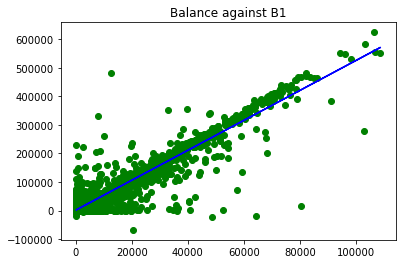

The score correlation score is 0.9072209581816055
The y intercept is:  [2220.63524534]
The gradient is:  [[5.23080151]]


In [22]:
#Appeared that balance is the best to predict B1, due to the strongest positive correlation, Question 5
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = np.array(df['BALANCE']).reshape(-1, 1)
y = np.array(df['B1']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='g')
plt.plot(X_test, y_pred, color ='b')
plt.title("Balance against B1")
plt.show()
print("The score correlation score is " + str(regr.score(X_test, y_test)))

lm = LinearRegression()
lm.fit(X_train, y_train)

print("The y intercept is: ",  lm.intercept_)
print("The gradient is: ", lm.coef_)
